In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv('E:/Datasets/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
df["Month"] = pd.to_datetime(df["Month"])

In [13]:
df = df.set_index("Month")

In [17]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Timeseries Characteristics

Text(0.5, 1.0, 'Trend of the Time Series')

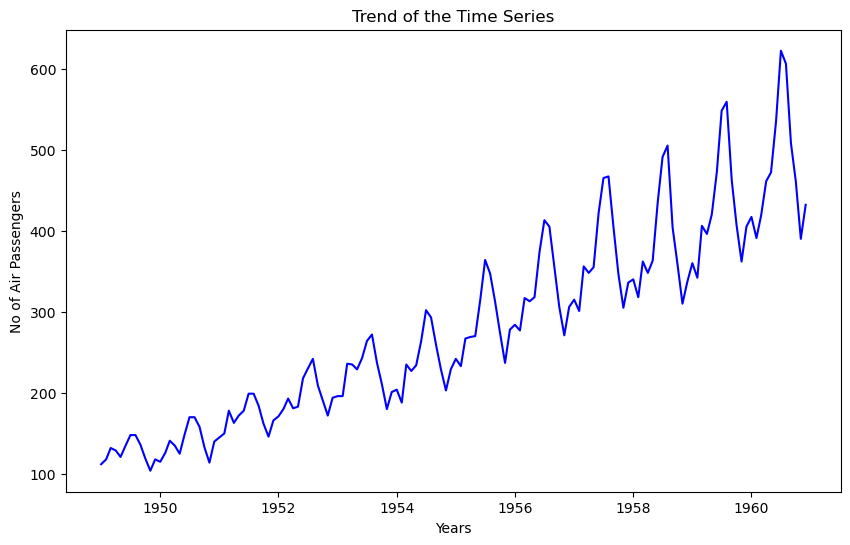

In [23]:
plt.figure(figsize= (10,6))
plt.plot(df, color="blue")
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

##### There is an overall increase in the trend with few variations

### Seasonality

In [26]:
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

<Axes: title={'center': 'Seasonality of the Time Series'}, xlabel='Month', ylabel='#Passengers'>

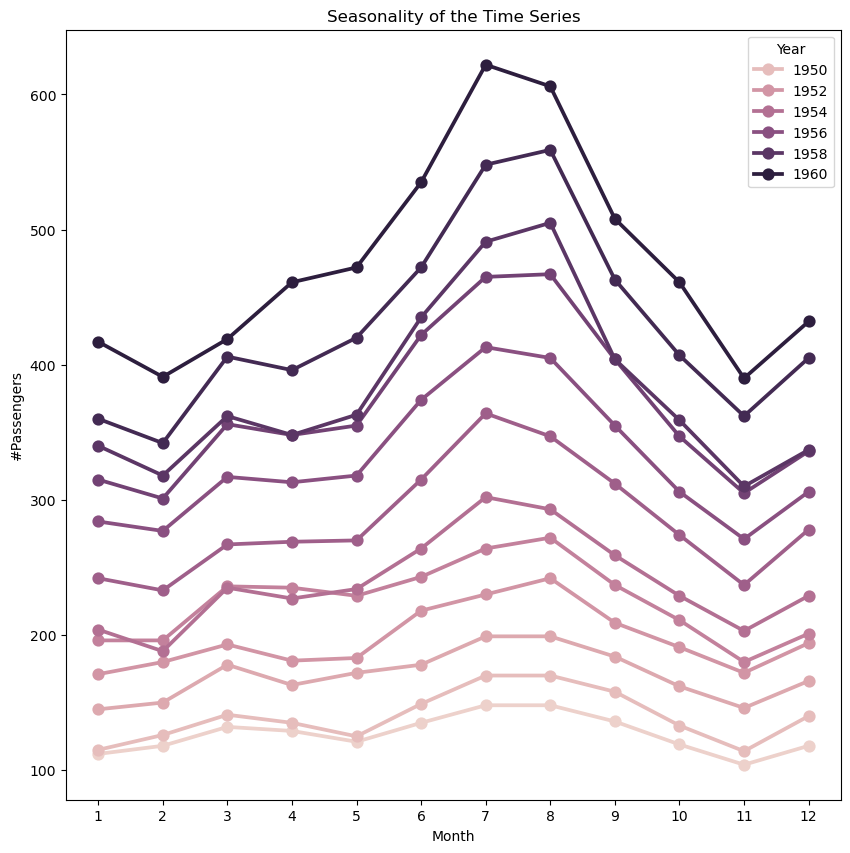

In [30]:
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='#Passengers',hue='Year',data=df_temp)

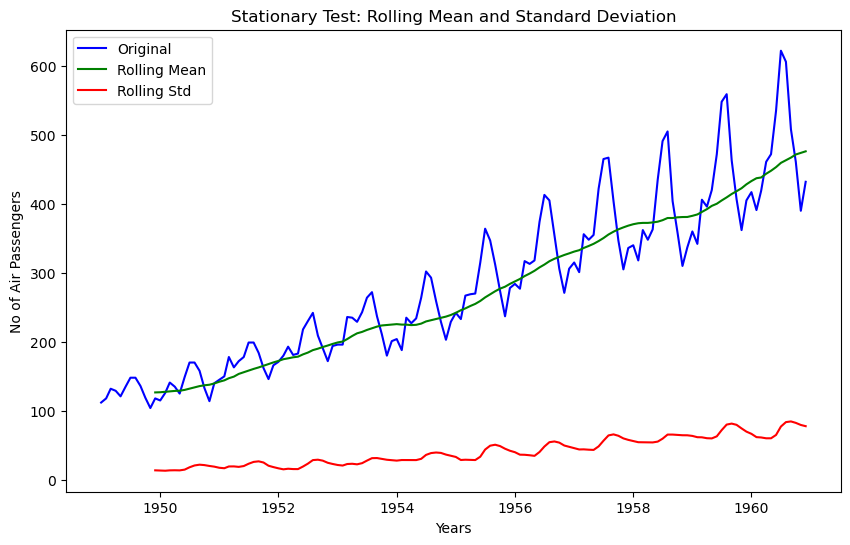

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
from statsmodels.tsa.stattools import adfuller
timeseries = df['#Passengers']

def stationarity_test(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='green', label='Rolling Mean')
    plt.plot(rolling_std, color='red', label='Rolling Std')
    plt.legend()
    plt.show()

    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)

    return rolling_mean, rolling_std

# Call the stationarity_test function with your time series
rolling_mean, rolling_std = stationarity_test(timeseries)

- Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series.- 
Null Hypothesis : Data is notstationaryy.

### Time series Decomposition

In [48]:
passenger_log = np.log(df)

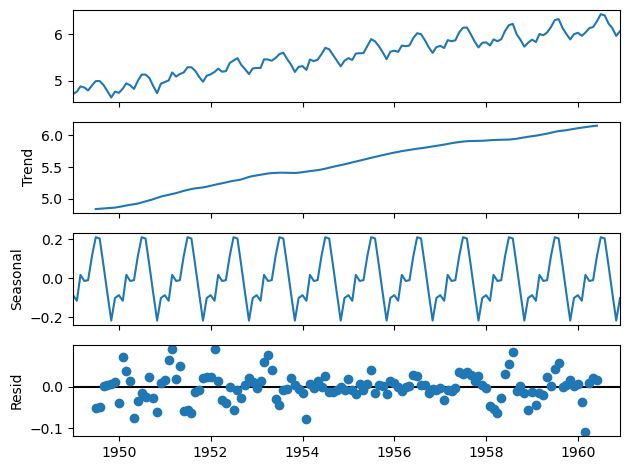

In [50]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(passenger_log,model ="additive")
fig = decomposition.plot()
plt.show()

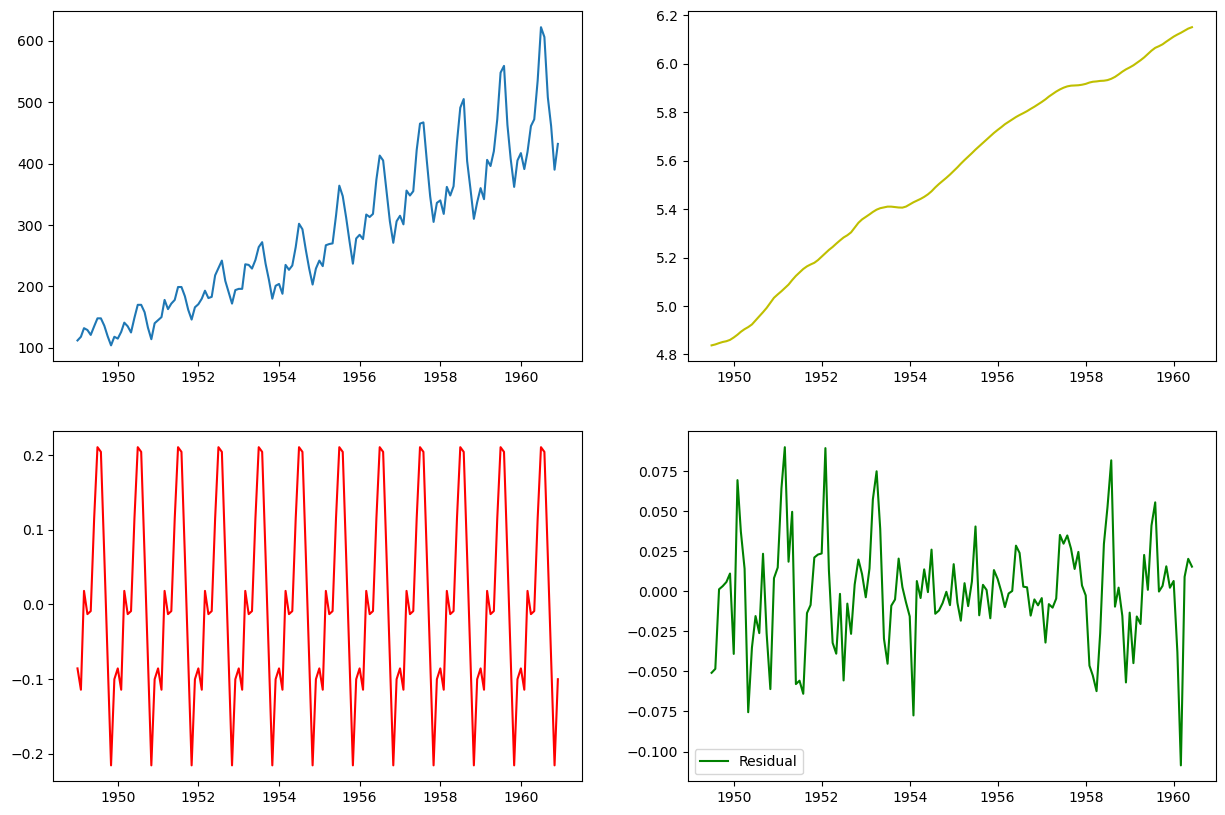

In [54]:
plt.figure(figsize=(15,10))
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(df,label="Original")
plt.subplot(222)
plt.plot(trend,label="Trend",color='y')
plt.subplot(223)
plt.plot(seasonality,label="Seasonality",color='r')
plt.subplot(224)
plt.plot(residual,label="Residual",color='g')

plt.legend()
plt.show()

##### Moving Average

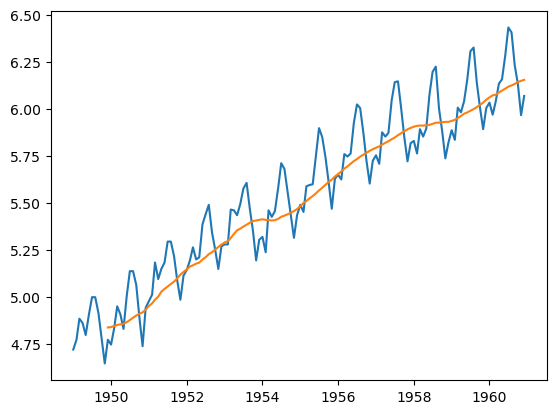

In [56]:
rollingmean = passenger_log.rolling(window=12).mean()
plt.plot(passenger_log)
plt.plot(rollingmean)

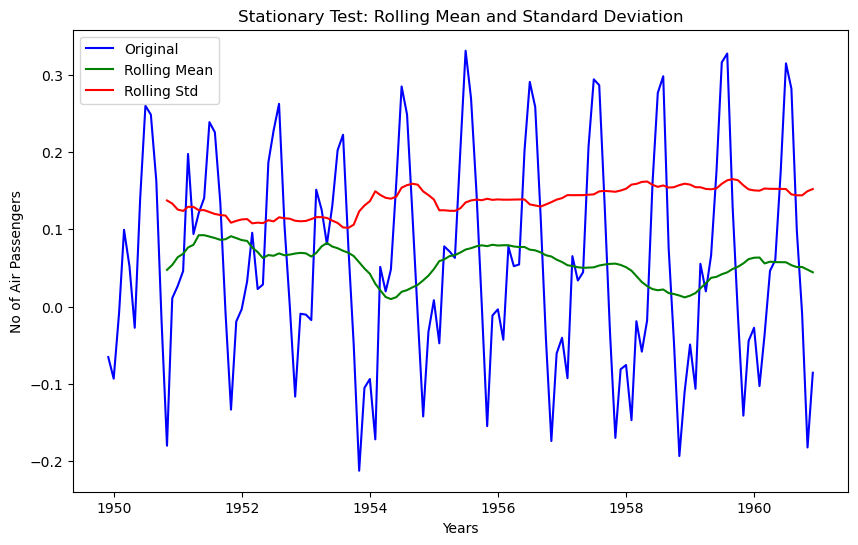

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


(            #Passengers
 Month                  
 1949-12-01          NaN
 1950-01-01          NaN
 1950-02-01          NaN
 1950-03-01          NaN
 1950-04-01          NaN
 ...                 ...
 1960-08-01     0.053566
 1960-09-01     0.051081
 1960-10-01     0.051255
 1960-11-01     0.047814
 1960-12-01     0.044372
 
 [133 rows x 1 columns],
             #Passengers
 Month                  
 1949-12-01          NaN
 1950-01-01          NaN
 1950-02-01          NaN
 1950-03-01          NaN
 1950-04-01          NaN
 ...                 ...
 1960-08-01     0.145302
 1960-09-01     0.144162
 1960-10-01     0.144082
 1960-11-01     0.149491
 1960-12-01     0.152260
 
 [133 rows x 1 columns])

In [63]:
passenger_log_rollingmean_diff = passenger_log - rollingmean
passenger_log_rollingmean_diff.dropna(inplace=True)
stationarity_test(passenger_log_rollingmean_diff)

##### Exponentially moving weighted average

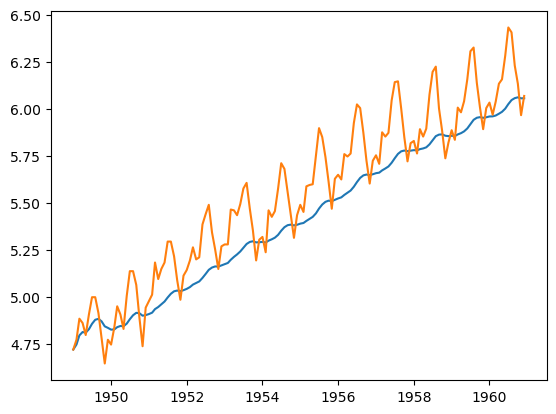

In [65]:
weighted_avg = passenger_log.ewm(halflife=12).mean()
plt.plot(weighted_avg)
plt.plot(passenger_log)

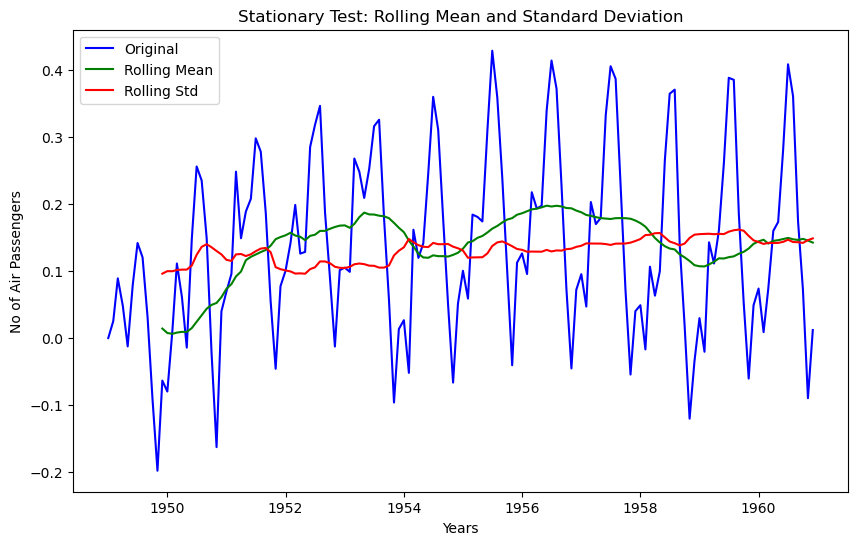

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01     0.147176
 1960-09-01     0.146208
 1960-10-01     0.147799
 1960-11-01     0.145360
 1960-12-01     0.142275
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01     0.143097
 1960-09-01     0.142855
 1960-10-01     0.141828
 1960-11-01     0.145924
 1960-12-01     0.148515
 
 [144 rows x 1 columns])

In [70]:
passenger_log_weighted_avg = passenger_log - weighted_avg
stationarity_test(passenger_log_weighted_avg)

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality

- Differencing – taking the difference with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.

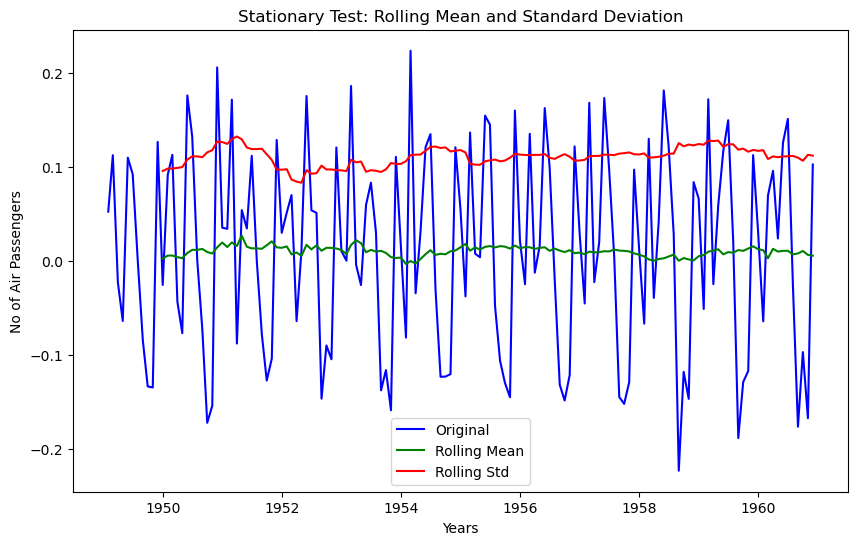

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


(            #Passengers
 Month                  
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 ...                 ...
 1960-08-01     0.006728
 1960-09-01     0.007730
 1960-10-01     0.010382
 1960-11-01     0.006209
 1960-12-01     0.005378
 
 [143 rows x 1 columns],
             #Passengers
 Month                  
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 ...                 ...
 1960-08-01     0.111374
 1960-09-01     0.109497
 1960-10-01     0.106223
 1960-11-01     0.112489
 1960-12-01     0.111669
 
 [143 rows x 1 columns])

In [73]:
passenger_shift = passenger_log - passenger_log.shift()
passenger_shift.dropna(inplace=True)
stationarity_test(passenger_shift)

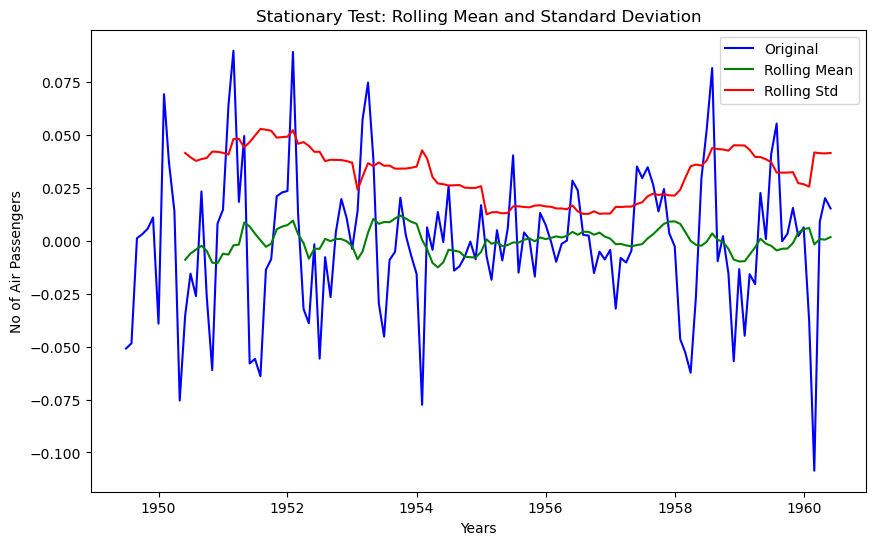

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


(Month
 1949-07-01         NaN
 1949-08-01         NaN
 1949-09-01         NaN
 1949-10-01         NaN
 1949-11-01         NaN
                 ...   
 1960-02-01    0.006082
 1960-03-01   -0.001657
 1960-04-01    0.000797
 1960-05-01    0.000595
 1960-06-01    0.001801
 Name: resid, Length: 132, dtype: float64,
 Month
 1949-07-01         NaN
 1949-08-01         NaN
 1949-09-01         NaN
 1949-10-01         NaN
 1949-11-01         NaN
                 ...   
 1960-02-01    0.025642
 1960-03-01    0.041773
 1960-04-01    0.041432
 1960-05-01    0.041322
 1960-06-01    0.041542
 Name: resid, Length: 132, dtype: float64)

In [75]:
residual = decomposition.resid
residual.dropna(inplace=True)
stationarity_test(residual)

In [77]:
import warnings
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [81]:
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.307319153203
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.2914901508539
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043232965
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445115
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730373
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571557
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312320684
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1196.9983614399885
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044362
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026810382253
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1049.5801418114274
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290382
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:985.3346478033133
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1194.713001097971
ARIMA(0, 1, 0)x(0, 1, 0, 12) - 

In [87]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(1,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3198      0.074     -4.299      0.000      -0.466      -0.174
ar.S.L12      -0.1526      0.093     -1.645      0.100      -0.334       0.029
sigma2       143.5585     17.846      8.044      0.000     108.581     178.536


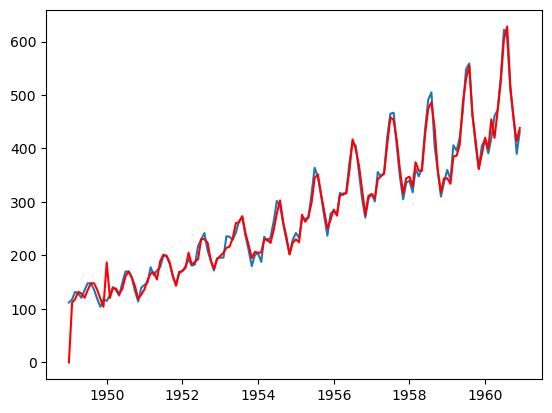

In [89]:
plt.plot(df)
plt.plot(results.fittedvalues, color='red')

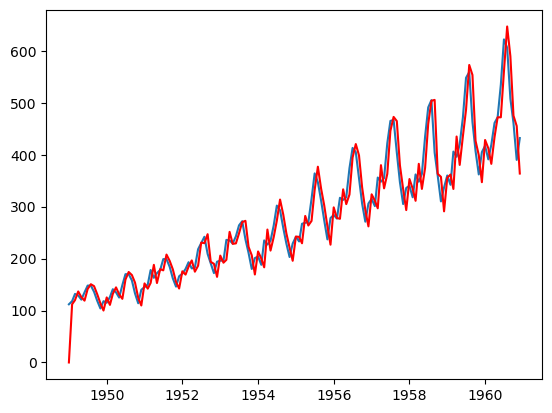

In [111]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df, order=(0, 1, 1))  
results_ARIMA = arima_model.fit()  
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='red')

### Auto Arima

In [93]:
from sklearn.model_selection import train_test_split

train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

In [95]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(1,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2708      0.107     -2.533      0.011      -0.480      -0.061
ar.S.L12      -0.2264      0.098     -2.319      0.020      -0.418      -0.035
sigma2        96.4907     16.774      5.752      0.000      63.614     129.367


In [100]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.761, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.29 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

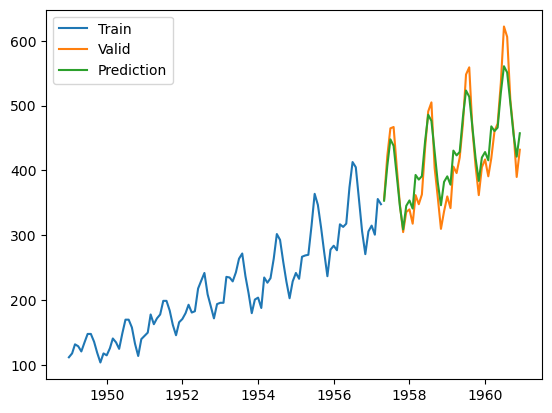

Optimized value for order: (1, 1, 0)
Optimized value for order: (1, 1, 0, 12)


In [102]:
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,stepwise=True,
                    m=12,n_fits=30)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()
print("Optimized value for order: {}".format(model.order))
print("Optimized value for order: {}".format(model.seasonal_order))

In [104]:
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score

rms = sqrt(mean_squared_error(valid,forecast))
print("Root mean square error : {}".format(rms))
print("R^2 Score : {}".format(r2_score(valid,forecast)))

Root mean square error : 26.20587025894556
R^2 Score : 0.882487992790634
